In [2]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np

In [3]:
df = pd.read_csv('ANSUR II MALE Public.csv', encoding = 'ISO-8859-1')

In [4]:
df.isnull().sum()

subjectid                            0
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

In [5]:
df = df[["cervicaleheight", "chestbreadth", "chestcircumference", "chestdepth", "chestheight", "elbowrestheight",
         "forearmcenterofgriplength", "forearmcircumferenceflexed", "forearmforearmbreadth", "forearmhandlength",
         "abdominalextensiondepthsitting", "acromionradialelength", "biacromialbreadth", "bicepscircumferenceflexed", 
         "bicristalbreadth", "bideltoidbreadth", "waistbreadth", "waistcircumference", "waistdepth", "waistfrontlengthsitting",
         "wristcircumference", "wristheight", "Heightin", "neckcircumferencebase", "shoulderlength", "waistbacklength", 
         "hipbreadth", "hipbreadthsitting", "interscyei", "interscyeii"]]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4082 entries, 0 to 4081
Data columns (total 30 columns):
cervicaleheight                   4082 non-null int64
chestbreadth                      4082 non-null int64
chestcircumference                4082 non-null int64
chestdepth                        4082 non-null int64
chestheight                       4082 non-null int64
elbowrestheight                   4082 non-null int64
forearmcenterofgriplength         4082 non-null int64
forearmcircumferenceflexed        4082 non-null int64
forearmforearmbreadth             4082 non-null int64
forearmhandlength                 4082 non-null int64
abdominalextensiondepthsitting    4082 non-null int64
acromionradialelength             4082 non-null int64
biacromialbreadth                 4082 non-null int64
bicepscircumferenceflexed         4082 non-null int64
bicristalbreadth                  4082 non-null int64
bideltoidbreadth                  4082 non-null int64
waistbreadth                 

In [7]:
df.isnull().sum()

cervicaleheight                   0
chestbreadth                      0
chestcircumference                0
chestdepth                        0
chestheight                       0
elbowrestheight                   0
forearmcenterofgriplength         0
forearmcircumferenceflexed        0
forearmforearmbreadth             0
forearmhandlength                 0
abdominalextensiondepthsitting    0
acromionradialelength             0
biacromialbreadth                 0
bicepscircumferenceflexed         0
bicristalbreadth                  0
bideltoidbreadth                  0
waistbreadth                      0
waistcircumference                0
waistdepth                        0
waistfrontlengthsitting           0
wristcircumference                0
wristheight                       0
Heightin                          0
neckcircumferencebase             0
shoulderlength                    0
waistbacklength                   0
hipbreadth                        0
hipbreadthsitting           

In [8]:
df['Heightin'] = df['Heightin'] * 25.4

In [9]:
df.head()

,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,elbowrestheight,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,abdominalextensiondepthsitting,acromionradialelength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,wristcircumference,wristheight,Heightin,neckcircumferencebase,shoulderlength,waistbacklength,hipbreadth,hipbreadthsitting,interscyei,interscyeii
0,1535,291,1074,259,1292,247,349,299,575,477,266,337,401,369,274,493,329,933,240,440,175,853,1803.4,436,145,501,332,366,422,441
1,1471,269,1021,253,1244,232,348,289,523,476,233,326,394,338,257,479,316,870,225,371,167,815,1727.2,420,141,432,312,356,441,447
2,1501,288,1120,267,1288,237,355,357,575,491,287,341,427,408,261,544,329,964,255,411,180,831,1727.2,434,167,472,349,393,462,475
3,1423,296,1114,262,1205,272,352,318,593,467,234,310,401,359,262,518,315,857,205,399,176,793,1676.4,446,148,461,338,367,458,461
4,1684,304,1048,232,1452,188,399,324,605,550,250,372,435,356,263,524,303,868,214,379,188,954,1955.8,430,180,467,332,372,481,505


In [10]:
df.describe()

,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,elbowrestheight,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,abdominalextensiondepthsitting,acromionradialelength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,wristcircumference,wristheight,Heightin,neckcircumferencebase,shoulderlength,waistbacklength,hipbreadth,hipbreadthsitting,interscyei,interscyeii
count,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000
mean,1517.299608,289.441450,1058.705537,253.847134,1291.118569,245.041646,349.010289,310.058550,579.928466,480.213866,254.650906,335.244488,415.675649,358.135718,275.433366,510.424792,326.437286,940.577413,237.771436,387.642822,175.916707,847.511514,1778.908476,434.596031,149.776090,477.612445,345.733219,379.297403,430.853503,450.163155
std,63.278343,18.279344,87.435272,26.246735,56.956697,28.653619,18.015101,21.990993,50.928760,23.286441,37.327178,17.482795,19.161654,34.618093,17.513508,32.505628,34.738095,111.705875,34.732597,29.349007,8.955055,41.655628,74.864436,25.674001,10.513306,27.728286,24.165314,30.205224,35.246805,30.488538
min,1269.000000,231.000000,774.000000,176.000000,1088.000000,138.000000,290.000000,233.000000,398.000000,400.000000,163.000000,270.000000,337.000000,246.000000,219.000000,374.000000,232.000000,648.000000,151.000000,293.000000,141.000000,695.000000,1524.000000,350.000000,113.000000,383.000000,264.000000,280.000000,328.000000,345.000000
25%,1475.000000,277.000000,996.000000,236.000000,1252.250000,226.000000,337.000000,295.000000,545.000000,465.000000,227.000000,324.000000,403.000000,335.000000,263.000000,489.000000,301.000000,857.000000,212.000000,367.000000,170.000000,819.000000,1727.200000,417.000000,142.000000,459.250000,329.250000,358.000000,406.000000,430.000000
50%,1517.000000,289.000000,1056.000000,253.000000,1289.000000,246.000000,348.500000,310.000000,579.000000,480.000000,251.000000,335.000000,415.000000,357.000000,275.000000,509.000000,325.000000,937.000000,234.000000,386.000000,176.000000,847.000000,1778.000000,433.000000,150.000000,477.000000,344.000000,378.000000,430.000000,450.000000
75%,1558.000000,301.000000,1117.000000,272.000000,1329.000000,265.000000,361.000000,324.000000,613.000000,495.000000,279.000000,346.000000,428.000000,380.000000,288.000000,531.000000,350.000000,1016.000000,261.000000,407.000000,182.000000,875.000000,1828.800000,450.750000,157.000000,495.000000,361.000000,397.000000,455.000000,471.000000
max,1738.000000,363.000000,1469.000000,383.000000,1506.000000,345.000000,416.000000,402.000000,778.000000,574.000000,451.000000,393.000000,489.000000,490.000000,334.000000,637.000000,459.000000,1379.000000,406.000000,494.000000,216.000000,1009.000000,2387.600000,545.000000,185.000000,598.000000,452.000000,509.000000,562.000000,577.000000


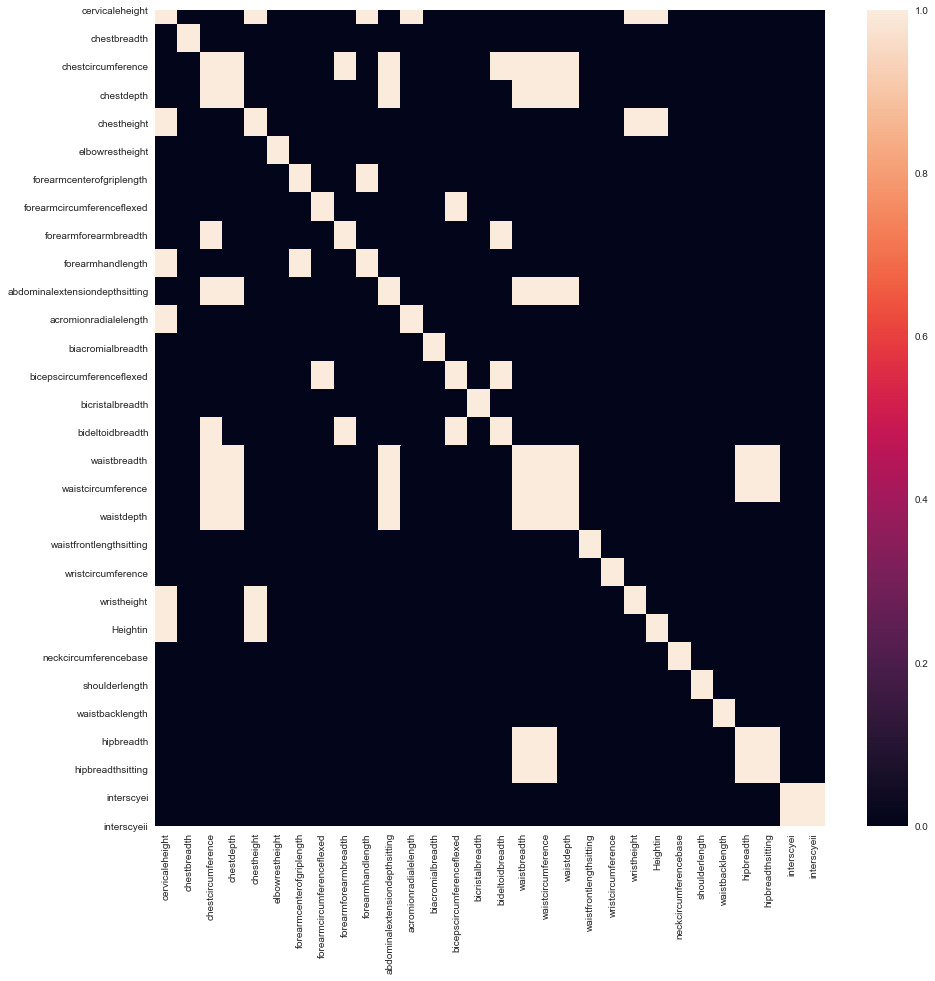

In [11]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr() > 0.8)

In [26]:
df_new = df[["Heightin", "neckcircumferencebase", "shoulderlength", "biacromialbreadth",
             "interscyei", "acromionradialelength", "forearmhandlength", "chestbreadth",
             "chestcircumference", "bicepscircumferenceflexed", "bicristalbreadth",
             "waistfrontlengthsitting", "wristcircumference"]]#, "waistcircumference"]]

In [27]:
df_new.head()

,Heightin,neckcircumferencebase,shoulderlength,biacromialbreadth,interscyei,acromionradialelength,forearmhandlength,chestbreadth,chestcircumference,bicepscircumferenceflexed,bicristalbreadth,waistfrontlengthsitting,wristcircumference
0,1803.4,436,145,401,422,337,477,291,1074,369,274,440,175
1,1727.2,420,141,394,441,326,476,269,1021,338,257,371,167
2,1727.2,434,167,427,462,341,491,288,1120,408,261,411,180
3,1676.4,446,148,401,458,310,467,296,1114,359,262,399,176
4,1955.8,430,180,435,481,372,550,304,1048,356,263,379,188


In [14]:
df_new.shape

(4082, 14)

In [28]:
kmeans = KMeans(n_clusters=6)

In [29]:
kmeans.fit(df_new)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [30]:
labels = kmeans.predict(df_new)

In [31]:
centroids = kmeans.cluster_centers_

In [32]:
centroids

array([[1727.76325238,  431.01161563,  146.625132  ,  408.71911299,
         428.7592397 ,  326.14889124,  467.20168955,  287.        ,
        1053.78775079,  357.31995776,  270.32840549,  381.38859556,
         173.26927138],
       [1809.3866485 ,  415.36920981,  151.54768392,  411.5027248 ,
         404.90599455,  339.21934605,  486.44141689,  276.96185286,
         968.41961853,  326.67302452,  269.2493188 ,  374.98910082,
         172.53814714],
       [1857.85342466,  468.93150685,  155.16666667,  437.66438356,
         472.4543379 ,  351.63242009,  502.38127854,  312.84018265,
        1196.55022831,  402.19863014,  297.44063927,  418.51141553,
         187.05707763],
       [1849.55365854,  439.25731707,  153.44390244,  424.41463415,
         434.3597561 ,  348.03780488,  497.68658537,  294.06463415,
        1069.70243902,  364.18170732,  282.2695122 ,  397.97804878,
         179.47804878],
       [1686.7172147 ,  408.54545455,  143.827853  ,  394.98646035,
         397.8007736

In [33]:
labels

array([3, 0, 5, ..., 0, 0, 2])

In [34]:
df_new['labels'] = labels

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [35]:
from sklearn.metrics import silhouette_score

In [36]:
range_n_clusters = list (range(2,10))

In [37]:
for n_clusters in range_n_clusters:
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(df_new)
    centers = clusterer.cluster_centers_

    score = silhouette_score (df_new, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.30578333171239946)
For n_clusters = 3, silhouette score is 0.24706580409060944)
For n_clusters = 4, silhouette score is 0.23943276770186211)
For n_clusters = 5, silhouette score is 0.2194464229377857)
For n_clusters = 6, silhouette score is 0.2050873197432978)
For n_clusters = 7, silhouette score is 0.19901578562226768)
For n_clusters = 8, silhouette score is 0.19058686734831978)
For n_clusters = 9, silhouette score is 0.17869633519243144)


In [1]:
from yellowbrick.cluster import KElbowVisualizer

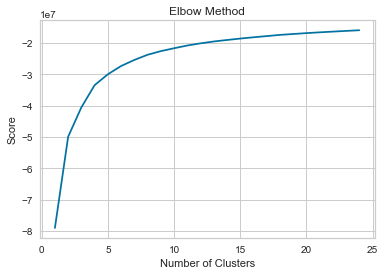

In [52]:
number_clusters = range(1, 25)

kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in number_clusters]
kmeans

score = [kmeans[i].fit(df_new).score(df_new) for i in range(len(kmeans))]
score

plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()

In [53]:
df_new.head()

,Heightin,neckcircumferencebase,shoulderlength,biacromialbreadth,interscyei,acromionradialelength,forearmhandlength,chestbreadth,chestcircumference,bicepscircumferenceflexed,bicristalbreadth,waistfrontlengthsitting,wristcircumference,labels,tsne-2d-one,tsne-2d-two
0,1803.4,436,145,401,422,337,477,291,1074,369,274,440,175,3,-2.936802,3.630323
1,1727.2,420,141,394,441,326,476,269,1021,338,257,371,167,0,4.979485,-4.507173
2,1727.2,434,167,427,462,341,491,288,1120,408,261,411,180,5,4.967022,6.161927
3,1676.4,446,148,401,458,310,467,296,1114,359,262,399,176,0,9.847279,4.351907
4,1955.8,430,180,435,481,372,550,304,1048,356,263,379,188,3,-11.625617,1.983824


In [56]:
df_new = df_new.sort_values(by = 'labels')

In [57]:
df_new.head()

,Heightin,neckcircumferencebase,shoulderlength,biacromialbreadth,interscyei,acromionradialelength,forearmhandlength,chestbreadth,chestcircumference,bicepscircumferenceflexed,bicristalbreadth,waistfrontlengthsitting,wristcircumference,labels,tsne-2d-one,tsne-2d-two
939,1727.2,412,160,424,457,319,460,295,1027,336,276,407,172,0,6.020296,-1.574510
1469,1752.6,433,152,414,420,325,477,292,1043,368,275,390,175,0,2.651426,-0.961198
3202,1701.8,438,146,387,408,319,452,288,1051,381,260,368,167,0,8.630646,-3.021647
750,1676.4,395,156,406,430,333,448,287,1067,329,260,379,163,0,10.774607,-2.638251
2349,1778.0,441,138,426,405,330,474,310,1074,370,286,394,168,0,0.249710,1.351841


In [58]:
df_0 = df_new.loc[df_new['labels'] == 0]

In [62]:
df_0 = df_0[['chestcircumference', 'biacromialbreadth', 'forearmhandlength']]

In [84]:
df_0.describe([0.9])

,chestcircumference,biacromialbreadth,forearmhandlength
count,947.000000,947.000000,947.00000
mean,1053.787751,408.719113,467.20169
std,29.209138,14.151374,16.67639
min,984.000000,363.000000,416.00000
50%,1054.000000,408.000000,467.00000
90%,1092.000000,426.000000,489.00000
max,1121.000000,454.000000,517.00000


In [85]:
df_1 = df_new.loc[df_new['labels'] == 1]
df_1= df_1[['chestcircumference', 'biacromialbreadth', 'forearmhandlength']]
df_1.describe([0.9])

,chestcircumference,biacromialbreadth,forearmhandlength
count,733.000000,733.000000,733.000000
mean,968.392906,411.452933,486.386085
std,36.929649,15.152847,17.298715
min,826.000000,343.000000,442.000000
50%,975.000000,412.000000,485.000000
90%,1011.000000,430.000000,508.000000
max,1039.000000,456.000000,552.000000


In [86]:
df_2 = df_new.loc[df_new['labels'] == 2]
df_2= df_2[['chestcircumference', 'biacromialbreadth', 'forearmhandlength']]
df_2.describe([0.9])

,chestcircumference,biacromialbreadth,forearmhandlength
count,438.000000,438.000000,438.000000
mean,1196.550228,437.664384,502.381279
std,51.548080,17.272328,18.901123
min,1111.000000,388.000000,456.000000
50%,1185.500000,438.000000,501.000000
90%,1272.000000,460.000000,529.000000
max,1469.000000,489.000000,574.000000


In [87]:
df_3 = df_new.loc[df_new['labels'] == 3]
df_3= df_3[['chestcircumference', 'biacromialbreadth', 'forearmhandlength']]
df_3.describe([0.9])

,chestcircumference,biacromialbreadth,forearmhandlength
count,821.000000,821.000000,821.000000
mean,1069.602923,424.443362,497.722290
std,35.642202,15.335222,18.130983
min,979.000000,381.000000,450.000000
50%,1069.000000,423.000000,495.000000
90%,1116.000000,445.000000,521.000000
max,1151.000000,471.000000,572.000000


In [88]:
df_4 = df_new.loc[df_new['labels'] == 4]
df_4= df_4[['chestcircumference', 'biacromialbreadth', 'forearmhandlength']]
df_4.describe([0.9])

,chestcircumference,biacromialbreadth,forearmhandlength
count,517.000000,517.000000,517.000000
mean,952.276596,394.986460,455.783366
std,43.259794,15.354273,17.724405
min,774.000000,337.000000,400.000000
50%,957.000000,395.000000,455.000000
90%,1002.400000,414.000000,479.000000
max,1041.000000,443.000000,519.000000


In [89]:
df_5 = df_new.loc[df_new['labels'] == 5]
df_5= df_5[['chestcircumference', 'biacromialbreadth', 'forearmhandlength']]
df_5.describe([0.9])

,chestcircumference,biacromialbreadth,forearmhandlength
count,626.000000,626.000000,626.000000
mean,1149.052716,421.346645,474.375399
std,36.607174,13.903656,15.897611
min,1080.000000,385.000000,427.000000
50%,1142.000000,421.000000,474.000000
90%,1200.000000,441.000000,495.000000
max,1285.000000,467.000000,532.000000


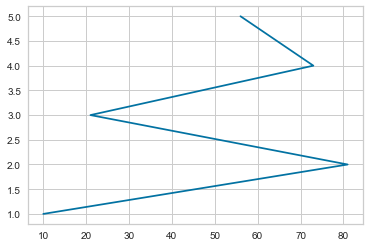

In [71]:
x = [10, 81, 21, 73, 56]
y = [1, 2, 3, 4, 5]
plt.plot(x, y)

In [19]:
fig = plt.figure(figsize=(5, 5))

colors = map(lambda x: colmap[x+1], labels)

plt.scatter(df[''], df['y'], color=colors, alpha=0.5, edgecolor='k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
plt.xlim(0, 80)
plt.ylim(0, 80)
aaplt.show()

KeyError: 'x'

<Figure size 360x360 with 0 Axes>

In [24]:
df.shape[1]

30

In [26]:
feat_cols = [ i for i in df.columns ]

In [30]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[feat_cols].values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
#df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
#Explained variation per principal component: [0.09746116 0.07155445 0.06149531]

Explained variation per principal component: [0.59596527 0.23555152]


In [39]:
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [40]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df_new)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 4082 samples in 0.011s...
[t-SNE] Computed neighbors for 4082 samples in 0.321s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4082
[t-SNE] Computed conditional probabilities for sample 2000 / 4082
[t-SNE] Computed conditional probabilities for sample 3000 / 4082
[t-SNE] Computed conditional probabilities for sample 4000 / 4082
[t-SNE] Computed conditional probabilities for sample 4082 / 4082
[t-SNE] Mean sigma: 19.773201
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.049179
[t-SNE] KL divergence after 300 iterations: 1.960834


In [41]:
df_new['tsne-2d-one'] = tsne_results[:,0]
df_new['tsne-2d-two'] = tsne_results[:,1]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [42]:
df_new.head()

,Heightin,neckcircumferencebase,shoulderlength,biacromialbreadth,interscyei,acromionradialelength,forearmhandlength,chestbreadth,chestcircumference,bicepscircumferenceflexed,bicristalbreadth,waistfrontlengthsitting,wristcircumference,labels,tsne-2d-one,tsne-2d-two
0,1803.4,436,145,401,422,337,477,291,1074,369,274,440,175,3,-2.936802,3.630323
1,1727.2,420,141,394,441,326,476,269,1021,338,257,371,167,0,4.979485,-4.507173
2,1727.2,434,167,427,462,341,491,288,1120,408,261,411,180,5,4.967022,6.161927
3,1676.4,446,148,401,458,310,467,296,1114,359,262,399,176,0,9.847279,4.351907
4,1955.8,430,180,435,481,372,550,304,1048,356,263,379,188,3,-11.625617,1.983824


## male clusters

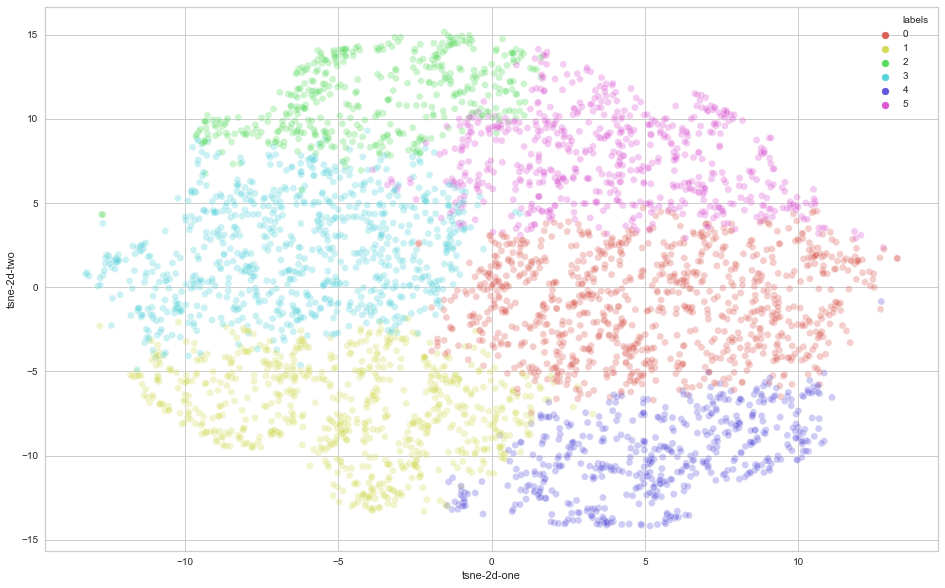

In [43]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="labels",
    palette=sns.color_palette("hls", 6),
    data=df_new,
    legend="full",
    alpha=0.3)

## Female distribution of N

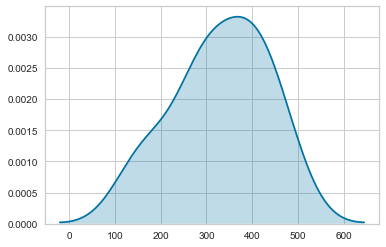

In [74]:
x = [280, 403, 461, 378, 301, 163]
sns.kdeplot(x, shade = True)

## Male distribution of N

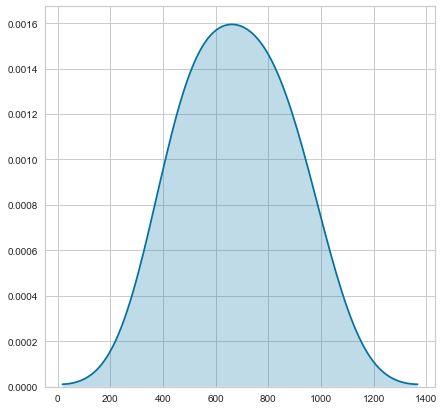

In [93]:
plt.figure(figsize = (7, 7))
x = [517, 733, 947, 821, 626, 438]
sns.kdeplot(x, shade = True)